<a href="https://colab.research.google.com/github/licciard/lu-phys3466/blob/main/fourier_transform_2_convolution_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image treating and convolution**

This notebook plays with the application of Fourier transform and convolutions in the treatment of images. Images are essentially signal amplitudes with the range given by a $N \times N$ matrix, where $N$ is the number of pixels along the $x$ and $y$ directions of the image.

In [ ]:
# modules used in the notebook

from scipy import misc, signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.fftpack as fp
import numpy as np
import copy

Let's first load a sample image available in the *scipy* module.

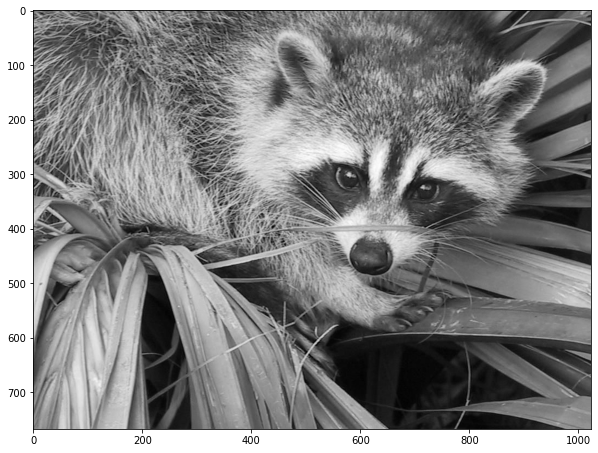

In [ ]:
face = misc.face(gray=True)

mpl.rcParams['figure.figsize'] = (10,10)
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

**Activity 1.** Now we calculate the FT of the image using the FFT function available in the module *scipy.fftpack*. Note that the function used to plot the FT is only plotting the magnitude because it plots the real part of $\log_{10}$ of the FT. Suggest another way to visualize the FT. (For example, plot the actual real and imaginary parts.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


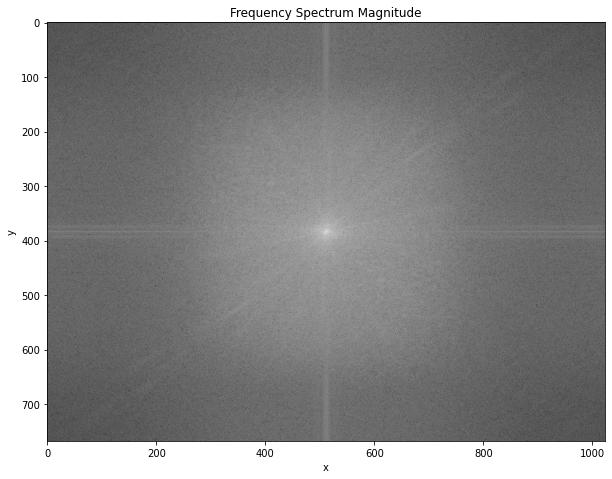

In [ ]:
orig_FT = fp.fft2((face).astype(float))
FT = fp.fftshift(orig_FT) # <-- shift the zero-frequency component to the center of the spectrum

fig, ax = plt.subplots()
plt.imshow( (20*np.log10( 0.1 + FT)).astype(int), cmap=plt.cm.gray) # <-- plotting function
ax.set_title('Frequency Spectrum Magnitude')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**Activity 2.** We want to apply a **high pass filter** on the image. We have to block the components with low frequency, that means the center region of the FT. (*We don't necessarily need the blocking filter to be a circle as shown in class, to simplify we will use a square.*) Replace the missing value in the code below to obtain the filter. As a result you should see the FT as above with a black square in the center.

**Activity 3.** You can vary the value of $n$ that determines the size of the window blocked by the filter to see how that affects the treated image.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


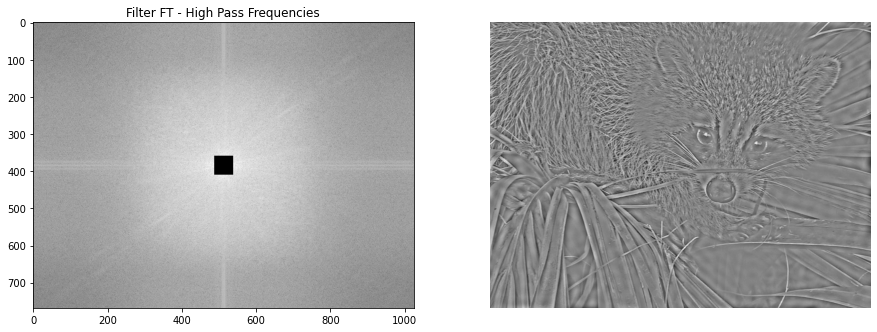

In [ ]:
# get image dimensions
(w, h) = face.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 25
FT_high = copy.copy(FT)
FT_high[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # <-- replace the ? by an appropriate value
face_high = fp.ifft2(fp.ifftshift(FT_high)).real

# plot figures
fig = plt.figure(figsize=(15,15))
ax_ft = fig.add_subplot(121)
ax_im = fig.add_subplot(122)
ax_ft.imshow( (20*np.log10( 0.1 + FT_high)).astype(int), cmap=plt.cm.gray)
ax_ft.set_title('Filter FT - High Pass Frequencies')
ax_im.imshow(face_high, cmap='gray')
ax_im.set_axis_off()
fig.show()

**Activity 4.** Now it is your turn to implement a low pass filter. This means only the center of the FT is not blocked. *(The inverse of what was done above.)*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


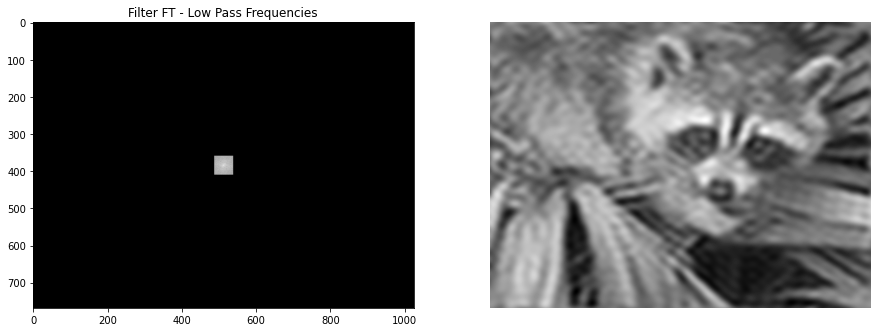

In [ ]:
# low pass filter
n = 25
FT_low = copy.copy(FT)
FT_low[:half_w-n,:] = 0 # <-- I am giving you a hint of one way to do this
FT_low[half_w+n+1:,:] = 0 # <-- I am giving you a hint of one way to do this
FT_low[:,:half_h-n] = 0 # <-- I am giving you a hint of one way to do this
FT_low[:,half_h+n+1:] = 0 # <-- I am giving you a hint of one way to do this
#  You will probably need 3 more lines of code here alike the one above
# ...
face_low = fp.ifft2(fp.ifftshift(FT_low)).real

# plot figures
fig = plt.figure(figsize=(15,15))
ax_ft = fig.add_subplot(121)
ax_im = fig.add_subplot(122)
ax_ft.imshow( (20*np.log10( 0.1 + FT_low)).astype(int), cmap=plt.cm.gray)
ax_ft.set_title('Filter FT - Low Pass Frequencies')
ax_im.imshow(face_low, cmap='gray')
ax_im.set_axis_off()
fig.show()

**Activity 6.** This last activity looks at a Gaussian kernel to treat images. As seen in the lecture, this kernel results in something similar to a low pass filter. The code below is ready to run. It creates a 2D Gaussian array centered at zero and $\sigma = 8$. Then it calls a function fftconvolve that evaluates the FT of both image and kernel to obtain the convolution. This is a nice direct function to quickly calculate convolutions. But you now have the tools to do it yourself. Have fun!

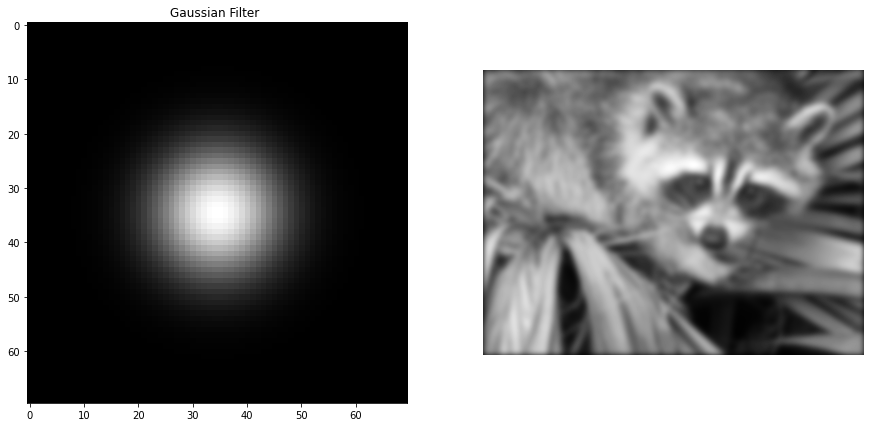

In [ ]:
kernel = np.outer(signal.windows.gaussian(70, 8),
                  signal.windows.gaussian(70, 8))
face_blurred = signal.fftconvolve(face, kernel, mode='same')

# plot figures
fig = plt.figure(figsize=(15,15))
ax_ft = fig.add_subplot(121)
ax_im = fig.add_subplot(122)
ax_ft.imshow( kernel, cmap=plt.cm.gray)
ax_ft.set_title('Gaussian Filter ')
ax_im.imshow(face_blurred, cmap='gray')
ax_im.set_axis_off()
fig.show()